# PyMC-GP Examples

In [1]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
np.random.seed(42)

# 2. ÎπÑÏÑ†Ìòï Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
# ---------------------
# GPÍ∞Ä ÌïôÏäµÌï† ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì≠ÎãàÎã§. sin Ìï®ÏàòÏóê ÎÖ∏Ïù¥Ï¶àÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
X = np.linspace(0, 10, 20)[:, None]  # 20Í∞úÏùò ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏
true_func = lambda x: np.sin(x) * 1.5
y = true_func(X).ravel() + np.random.normal(0, 0.4, 20) # Ïã§Ï†ú Ìï®ÏàòÍ∞íÏóê ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä


# 3. PyMCÎ•º Ïù¥Ïö©Ìïú GP Î™®Îç∏ Ï†ïÏùò
# ----------------------------
with pm.Model() as gp_model:
    # --- Ïª§ÎÑê ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌïú ÏÇ¨Ï†ÑÎ∂ÑÌè¨(Priors) ÏÑ§Ï†ï ---
    # Í∏∏Ïù¥Ï≤ôÎèÑ(lengthscale, ‚Ñì): Ìï®ÏàòÍ∞Ä ÏñºÎßàÎÇò Î∂ÄÎìúÎü¨Ïö¥ÏßÄÎ•º Ï†úÏñ¥Ìï©ÎãàÎã§.
    # Gamma Î∂ÑÌè¨Î•º ÏÇ¨Ïö©Ìï¥ ÏñëÏàò Í∞íÏùÑ Í∞ÄÏßÄÎèÑÎ°ù Ìï©ÎãàÎã§.
    lengthscale = pm.Gamma("‚Ñì", alpha=2, beta=0.5)

    # Ï∂úÎ†• Ïä§ÏºÄÏùº(output-scale, Œ∑): Ìï®ÏàòÏùò ÌèâÍ∑†Ï†ÅÏù∏ Î≥ÄÎèôÌè≠ÏùÑ Ï†úÏñ¥Ìï©ÎãàÎã§.
    # HalfCauchy Î∂ÑÌè¨Îäî ÏñëÏàò Í∞íÏùÑ Í∞ÄÏßÄÎ©∞, Í∞ÄÎÅî ÌÅ∞ Í∞íÏù¥ ÎÇòÏò¨ Ïàò ÏûàÎèÑÎ°ù Ïú†Ïó∞ÏÑ±ÏùÑ Ï§çÎãàÎã§.
    eta = pm.HalfCauchy("Œ∑", beta=3)

    # --- Ïª§ÎÑê(Í≥µÎ∂ÑÏÇ∞ Ìï®Ïàò) Ï†ïÏùò ---
    # ExpQuad(Squared Exponential) Ïª§ÎÑêÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏù∏ ÏÑ†ÌÉùÏûÖÎãàÎã§.
    # ÏúÑÏóêÏÑú Ï†ïÏùòÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞(ÌôïÎ•† Î≥ÄÏàò)Î•º Ïª§ÎÑêÏóê Ï†ÑÎã¨Ìï©ÎãàÎã§.
    cov_func = eta**2 * pm.gp.cov.ExpQuad(input_dim=1, ls=lengthscale)

    # --- GP ÏÇ¨Ï†ÑÎ∂ÑÌè¨(Prior) Ï†ïÏùò ---
    # pm.gp.LatentÎ•º ÏÇ¨Ïö©Ìï¥ Ïû†Ïû¨(Latent) GPÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
    # Ïù¥ GPÎäî Ïö∞Î¶¨Í∞Ä Ï∂îÏ†ïÌïòÍ≥†Ïûê ÌïòÎäî Ïã§Ï†ú Ìï®Ïàò f(x)Ïóê ÎåÄÌïú ÏÇ¨Ï†Ñ ÎØøÏùåÏûÖÎãàÎã§.
    gp = pm.gp.Latent(cov_func=cov_func)

    # Î™®Îç∏Ïù¥ ÌïôÏäµÌï† Îç∞Ïù¥ÌÑ∞ XÏóê ÎåÄÌï¥ GP ÏÇ¨Ï†ÑÎ∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ Ìï®Ïàò fÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    f = gp.prior("f", X=X)

    # --- Í∞ÄÎä•ÎèÑ(Likelihood) Ï†ïÏùò ---
    # Í¥ÄÏ∏° ÎÖ∏Ïù¥Ï¶à(sigma, œÉ)Ïóê ÎåÄÌïú ÏÇ¨Ï†ÑÎ∂ÑÌè¨Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
    sigma = pm.HalfCauchy("œÉ", beta=3)

    # Í¥ÄÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ yÎäî Ïû†Ïû¨ Ìï®Ïàò fÏóê Ï†ïÍ∑úÎ∂ÑÌè¨ ÎÖ∏Ïù¥Ï¶à(sigma)Í∞Ä ÎçîÌï¥ÏßÑ Í≤∞Í≥ºÎùºÍ≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
    # Ïù¥Í≤ÉÏù¥ Îç∞Ïù¥ÌÑ∞ÏôÄ GP Î™®Îç∏ÏùÑ Ïó∞Í≤∞ÌïòÎäî ÌïµÏã¨ Î∂ÄÎ∂ÑÏûÖÎãàÎã§.
    y_obs = pm.Normal("y_obs", mu=f, sigma=sigma, observed=y)


# 4. MCMCÎ•º Ïù¥Ïö©Ìïú ÏÇ¨ÌõÑ Î∂ÑÌè¨ Ï∂îÎ°†
# -------------------------------
with gp_model:
    # PyMCÏùò NUTS ÏÉòÌîåÎü¨Î•º ÏÇ¨Ïö©Ìï¥ ÏÇ¨ÌõÑ Î∂ÑÌè¨ÏóêÏÑú 2000Í∞úÏùò ÏÉòÌîåÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
    # Ïù¥ Í≥ºÏ†ïÏóêÏÑú f, ‚Ñì, Œ∑, œÉ Îì± Î™®Îì† ÌôïÎ•† Î≥ÄÏàòÏùò ÏÇ¨ÌõÑ Î∂ÑÌè¨Í∞Ä Í≥ÑÏÇ∞Îê©ÎãàÎã§.
    trace = pm.sample(2000, tune=1000, cores=1)


Initializing NUTS using jitter+adapt_diag...
/home/lsw91/Workspace/pymc-gp/.venv/lib/python3.11/site-packages/pytensor/link/c/cmodule.py:2968: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Sequential sampling (2 chains in 1 job)
NUTS: [‚Ñì, Œ∑, f_rotated_, œÉ]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 69 seconds.
There were 202 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


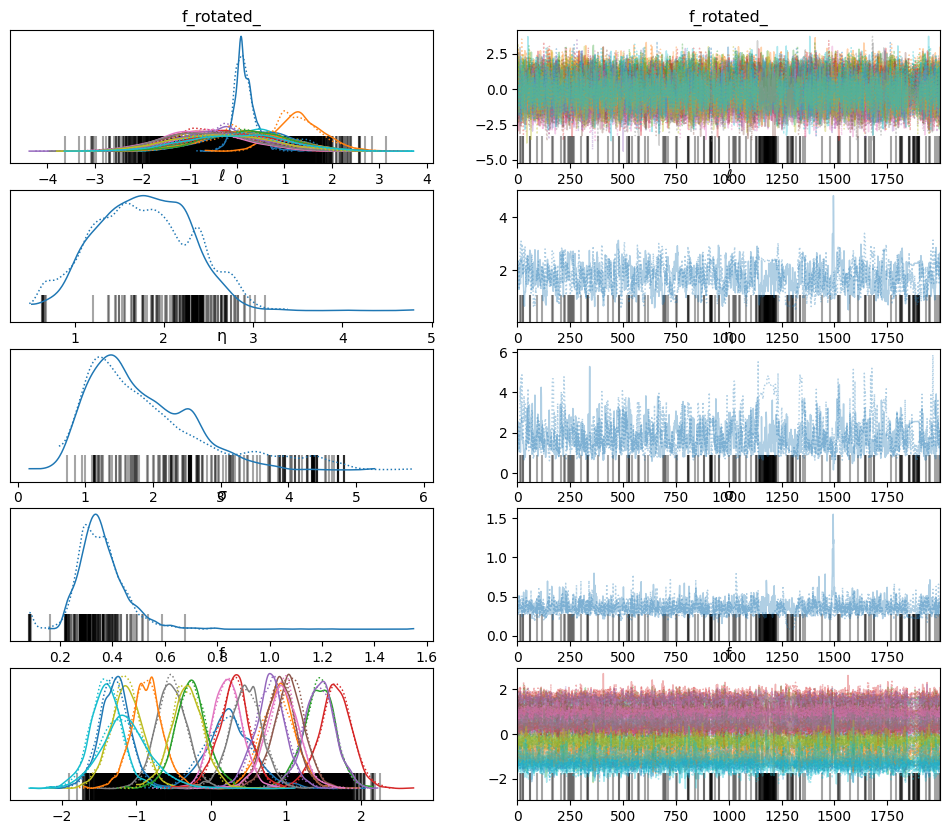

In [2]:
az.plot_trace(trace)
plt.show()

In [3]:
# 5. ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
# ---------------------------
# ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï† ÏÉàÎ°úÏö¥ xÏ¢åÌëú(X_new)Î•º Ï¥òÏ¥òÌïòÍ≤å ÏÉùÏÑ±Ìï©ÎãàÎã§.
Xnew = np.linspace(-2, 12, 100)[:, None]

with gp_model:
    # gp.conditional Î©îÏÑúÎìúÎäî ÌïôÏäµÎêú ÏÇ¨ÌõÑ Î∂ÑÌè¨Î•º Í∏∞Î∞òÏúºÎ°ú,
    # ÏÉàÎ°úÏö¥ ÏûÖÎ†• X_newÏóê ÎåÄÌïú Ìï®Ïàò Í∞í(f_new)Ïùò Î∂ÑÌè¨Î•º Í≥ÑÏÇ∞Ìï¥Ï§çÎãàÎã§.
    f_pred = gp.conditional("f_pred", Xnew=Xnew)

In [13]:
with gp_model:
    # ÏúÑÏóêÏÑú Ï†ïÏùòÌïú Ï°∞Í±¥Î∂Ä Î∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ ÏòàÏ∏° ÏÉòÌîåÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
    # Ïù¥Í≤ÉÏù¥ "ÏÇ¨ÌõÑ ÏòàÏ∏° ÏÉòÌîåÎßÅ" Í≥ºÏ†ïÏûÖÎãàÎã§.
    pred_samples = pm.sample_posterior_predictive(trace.posterior.sel(draw=slice(None, None, 20)), var_names=["f_pred"])

Sampling: [f_pred]


Output()

In [44]:
pred_samples

Inference data with groups:
	> posterior_predictive
	> observed_data

In [18]:
pred_samples.posterior_predictive.stack(samples=("chain", "draw"))

<xarray.Dataset> Size: 166kB
Dimensions:       (f_pred_dim_0: 100, samples: 200)
Coordinates:
  * f_pred_dim_0  (f_pred_dim_0) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
  * samples       (samples) object 2kB MultiIndex
  * chain         (samples) int64 2kB 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
  * draw          (samples) int64 2kB 0 20 40 60 80 ... 1900 1920 1940 1960 1980
Data variables:
    f_pred        (f_pred_dim_0, samples) float64 160kB -3.183 -2.7 ... -1.732
Attributes:
    created_at:                 2025-10-16T07:17:31.895805+00:00
    arviz_version:              0.22.0
    inference_library:          pymc
    inference_library_version:  5.25.1

In [27]:
predictions = pred_samples.posterior_predictive.stack(samples=("chain", "draw"))
predictions['f_pred'].isel(samples=0)

<xarray.DataArray 'f_pred' (f_pred_dim_0: 100)> Size: 800B
array([-3.18349096, -3.07866363, -2.94434662, -2.780732  , -2.58862917,
       -2.36948644, -2.12539236, -1.85905823, -1.57377754, -1.27336605,
       -0.96208352, -0.64453828, -0.32557878, -0.01017819,  0.29668914,
        0.59016822,  0.86564261,  1.11884363,  1.3459482 ,  1.54366291,
        1.70928845,  1.84076793,  1.93671424,  1.99641892,  2.01984305,
        2.00759205,  1.96087554,  1.88145703,  1.77159457,  1.6339752 ,
        1.47164703,  1.28795134,  1.08645479,  0.87088621,  0.64507708,
        0.41290691,  0.1782517 , -0.05506015, -0.28329212, -0.50283759,
       -0.7102609 , -0.90233305, -1.07607124, -1.22877773, -1.35807872,
       -1.461965  , -1.53883138, -1.58751343, -1.60732335, -1.59807694,
       -1.56011683, -1.49432515, -1.40212428, -1.2854671 , -1.14681306,
       -0.9890897 , -0.81564167, -0.63016587, -0.43663492, -0.23921209,
       -0.04215787,  0.1502673 ,  0.33390157,  0.50477683,  0.65921069,
        0.79388708,  0.90592938,  0.99295721,  1.05312931,  1.08517188,
        1.08838832,  1.06265634,  1.00840754,  0.9265971 ,  0.81865927,
        0.6864567 ,  0.53222259,  0.35849989,  0.16807784, -0.03606845,
       -0.25083735, -0.47305573, -0.69952864, -0.92708387, -1.15261092,
       -1.37309503, -1.58564646, -1.78752561, -1.97616565, -2.14919263,
       -2.30444444, -2.43998792, -2.5541363 , -2.64546581, -2.71283279,
       -2.75538785, -2.77259085, -2.7642245 , -2.7304037 , -2.67158301])
Coordinates:
  * f_pred_dim_0  (f_pred_dim_0) int64 800B 0 1 2 3 4 5 6 ... 94 95 96 97 98 99
    samples       object 8B (np.int64(0), np.int64(0))
    chain         int64 8B 0
    draw          int64 8B 0

In [ ]:
mean_pred['f_pred'].values

array([-0.95499589, -0.9448675 , -0.92529212, -0.89553208, -0.8550262 ,
       -0.80334484, -0.74011847, -0.66500993, -0.57774463, -0.47815972,
       -0.36623509, -0.24211554, -0.10616758,  0.0409029 ,  0.19789505,
        0.3629736 ,  0.5335892 ,  0.7064678 ,  0.87765762,  1.04262979,
        1.19644447,  1.33399724,  1.45034287,  1.54106567,  1.6026425 ,
        1.63273358,  1.63034617,  1.59584359,  1.53080899,  1.43779872,
        1.32002579,  1.18101053,  1.02424347,  0.8529272 ,  0.66987329,
        0.47759617,  0.27856837,  0.07552386, -0.12832598, -0.32924953,
       -0.52312817, -0.70570649, -0.87288684, -1.02101041, -1.14708136,
       -1.24889762, -1.32506859, -1.37493022, -1.39839863, -1.39581545,
       -1.36782864, -1.31533911, -1.23952973, -1.14197265, -1.02477541,
       -0.89068841, -0.7430859 , -0.58576919, -0.42261872, -0.25720219,
       -0.09248271,  0.0692597 ,  0.226265  ,  0.37695327,  0.51953624,
        0.65172202,  0.77062514,  0.87292621,  0.95523384,  1.01

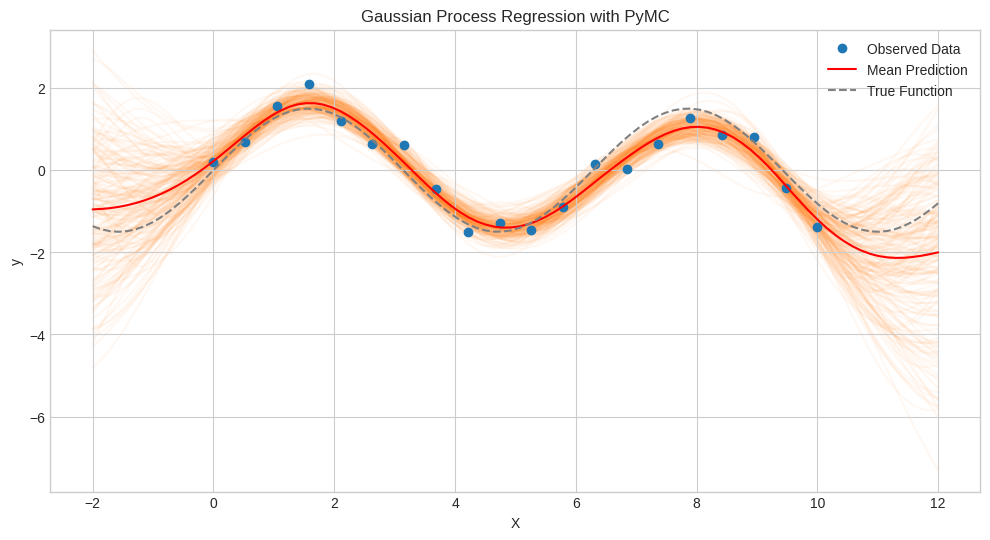

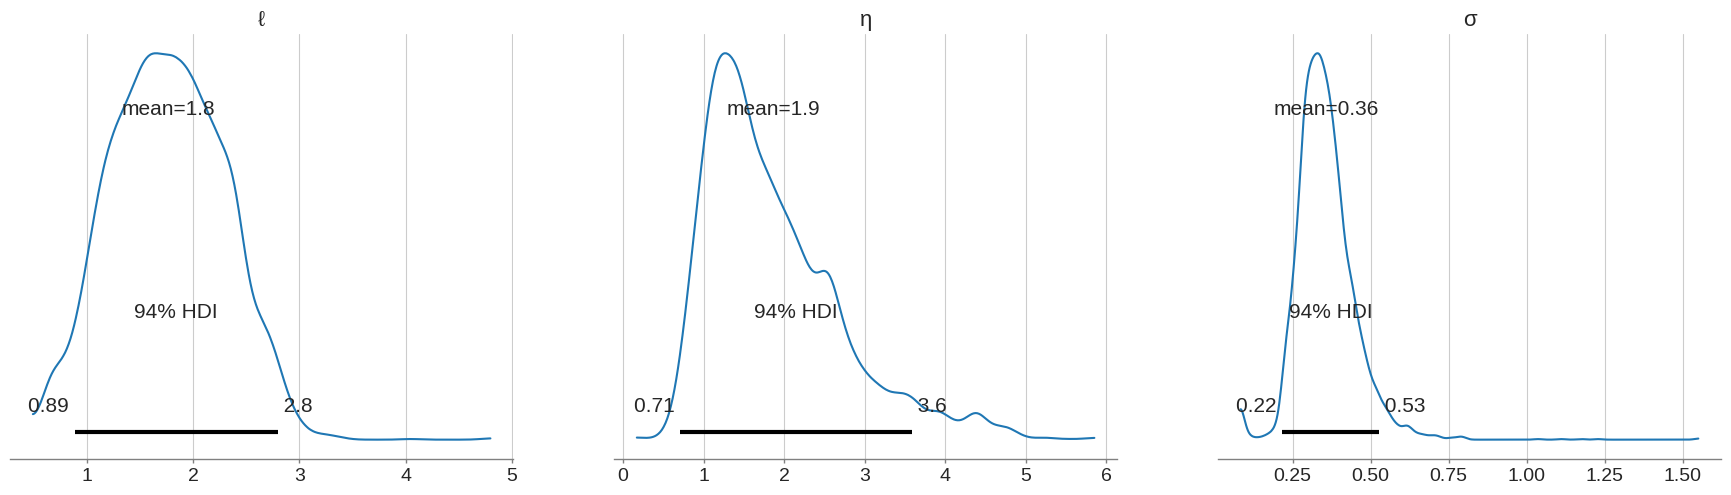

In [43]:
# 6. Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# --------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

# ÏÇ¨ÌõÑ ÏòàÏ∏°Ïùò ÌèâÍ∑†Í≥º Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞
# pred_samplesÏóêÏÑú f_predÏùò ÏÉòÌîåÎì§ÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
predictions = pred_samples.posterior_predictive.stack(samples=("chain", "draw"))
mean_pred = predictions.mean(dim="samples") # ÏÉòÌîåÎì§Ïùò ÌèâÍ∑† -> ÏòàÏ∏° ÌèâÍ∑† Ìï®Ïàò
# hdi_94 = az.hdi(posterior_predictive_samples, hdi_prob=0.94) # 94% ÏµúÍ≥† Î∞ÄÎèÑ Íµ¨Í∞Ñ(HDI)

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌîåÎ°úÌåÖ (ÌååÎûÄÏÉâ Ï†ê)
ax.plot(X, y, 'o', color='tab:blue', label="Observed Data")

# GP ÏòàÏ∏° ÌèâÍ∑† ÌîåÎ°úÌåÖ (Ï£ºÌô©ÏÉâ ÏÑ†)
ax.plot(Xnew, mean_pred['f_pred'].values, "-", color='red', label="Mean Prediction")

for i in range(len(predictions.samples)):
    y_pred = predictions['f_pred'].isel(samples=i)
    ax.plot(Xnew, y_pred, "-", color='tab:orange', alpha=0.05, zorder=-1)

# Ïã§Ï†ú Ìï®Ïàò ÌîåÎ°úÌåÖ (ÌöåÏÉâ Ï†êÏÑ†)
ax.plot(Xnew, true_func(Xnew), '--', color='gray', label='True Function')


ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Gaussian Process Regression with PyMC")
ax.legend()
plt.show()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïùò ÏÇ¨ÌõÑ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
az.plot_posterior(trace, var_names=["‚Ñì", "Œ∑", "œÉ"]);
plt.show()